#### Download data

In [30]:
from funding_rate_hedge_test import Fundingrate
Fundingrate.get_all_coin_historical_data(coins=['UMAUSDT'], start='2020-01-01', end='2024-01-01', interval='3m')

Getting all coins download links...
Creating folder...
Download future files...
Combine future files...


100%|██████████| 1/1 [00:00<00:00, 86.78it/s]

Delete all files except combined files...
Csv to Feather in future folder...


#### Read data

In [32]:
import pandas as pd
df = pd.read_feather('data_future/UMAUSDT_FUTURE_2020-01-01@2024-01-01@3m.feather')
df

open_time   open   high    low  close  volume     close_time  \
0       1683721800000  2.657  2.944  2.605  2.677   26795  1683721979999   
1       1683721980000  2.677  2.683  2.660  2.666   16291  1683722159999   
2       1683722160000  2.662  2.677  2.660  2.675    8930  1683722339999   
3       1683722340000  2.675  2.682  2.671  2.680    6630  1683722519999   
4       1683722520000  2.680  2.722  2.680  2.717   14475  1683722699999   
...               ...    ...    ...    ...    ...     ...            ...   
113025  1704066300000  2.225  2.229  2.223  2.229    9058  1704066479999   
113026  1704066480000  2.230  2.232  2.228  2.228    4163  1704066659999   
113027  1704066660000  2.228  2.228  2.225  2.228    1842  1704066839999   
113028  1704066840000  2.228  2.229  2.224  2.227    2764  1704067019999   
113029  1704067020000  2.228  2.234  2.228  2.231    6154  1704067199999   

        quote_volume  count  taker_buy_volume  taker_buy_quote_volume  ignore  
0          72343.568    657             12352               33261.595   False  
1          43555.142    361              5623               15041.573   False  
2          23821.925    234              5202               13882.583   False  
3          17750.066    136              3717                9956.182   False  
4          39157.960    373              8971               24260.802   False  
...              ...    ...               ...                     ...     ...  
113025     20164.137    177              5659               12601.269   False  
113026      9284.389    125              1300                2900.105   False  
113027      4101.554     59               823                1832.752   False  
113028      6153.443     79              1249                2781.025   False  
113029     13733.350    109              2314                5162.889   False  

[113030 rows x 12 columns]

In [33]:
import pandas as pd
import numpy as np
from rsi_divergence_strategy.Strategies import *
from rsi_divergence_strategy.StrategyTester import StrategyTester
from tqdm import tqdm
from rsi_divergence_strategy.StrategyOptimizer import StrategyOptimizer
import warnings
warnings.filterwarnings('ignore')

df['date'] = pd.to_datetime(df['open_time'], unit='ms')
df.set_index('date',inplace=True)
df.drop(columns=['open_time','ignore','taker_buy_quote_volume','taker_buy_volume','count','quote_volume','close_time'],inplace=True)
# Rename multiple columns
df = df.rename(columns={"open": "Open", "high": "High", "low": "Low", "close": "Close", "volume": "Vol"})

# Add useless columns
df['spread'] = 0
df['pips'] = 0

df.head(5)

Open   High    Low  Close    Vol  spread  pips
date                                                                
2023-05-10 12:30:00  2.657  2.944  2.605  2.677  26795       0     0
2023-05-10 12:33:00  2.677  2.683  2.660  2.666  16291       0     0
2023-05-10 12:36:00  2.662  2.677  2.660  2.675   8930       0     0
2023-05-10 12:39:00  2.675  2.682  2.671  2.680   6630       0     0
2023-05-10 12:42:00  2.680  2.722  2.680  2.717  14475       0     0

In [41]:
tester=StrategyTester(data=df, symbol='UMAUSDT', strategy_func=rsi_divergence)
tester.test_strategy(freq=45,window=19,order=2)

buy_and_hold  rsi_divergence_strategy
simple_return       0.82113                  9.89558
mean_return        -0.30610                  3.56005
stddev              0.92120                  0.91908
sharpe_ratio       -0.33229                  3.87350
sortino_ratio      -0.47717                  5.19388
max_dd              0.53769                  0.29673
cagr               -0.26369                 34.16503
calmar_ratio       -0.49041                115.13728
kelly               0.10393                  0.17731

In [42]:
tester.plot_results()

In [37]:
tester.plot_results()

In [43]:
tester.plot_trades(start='2023-06-01',end='2023-11-01')

  0%|          | 0/270 [00:00<?, ?it/s]

100%|██████████| 270/270 [03:14<00:00,  1.39it/s]


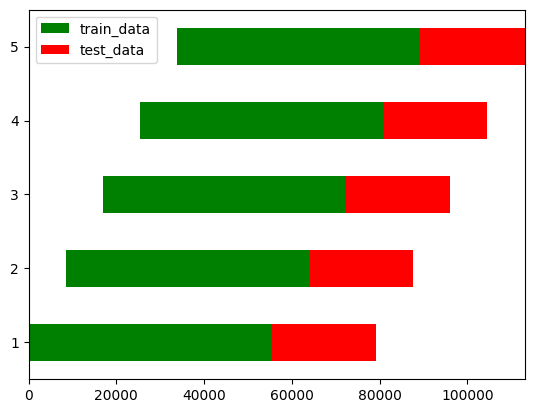

In [39]:
optimizer=StrategyOptimizer(folds=5, test_size=0.3, symbol='UMAUSDT', data_tester=df, 
                            strategy_func=rsi_divergence)
optimizer.test_params(freq=[15,30,45], window=(10,20,1), order=(2,11,1))

In [40]:
optimizer.results_overview.sort_values(by='simple_return', ascending=False)

freq  window  order  simple_return  mean_return    stddev  sharpe_ratio  \
261    45      19      2       3.222386     3.688558  0.817286      4.566318   
0      15      10      2       3.172134     3.642838  0.811074      4.537334   
252    45      18      2       3.133724     3.594338  0.817322      4.442874   
184    45      10      6       3.085192     3.542990  0.809868      4.469572   
81     15      19      2       3.069562     3.500842  0.811098      4.347376   
..    ...     ...    ...            ...          ...       ...           ...   
171    30      19      2       1.586140     1.435924  0.779630      1.885936   
162    30      18      2       1.576854     1.416402  0.779632      1.863216   
153    30      17      2       1.572322     1.406436  0.779632      1.850442   
144    30      16      2       1.570106     1.401964  0.779632      1.844646   
99     30      11      2       1.568966     1.389908  0.779630      1.848798   

     sortino_ratio    max_dd       cagr  calmar_ratio     kelly  
261       5.994364  0.258532  42.295594    177.942636  0.203112  
0         6.045108  0.241878  39.843882    175.120984  0.266334  
252       5.832230  0.258532  39.084630    163.347020  0.202058  
184       5.922672  0.269012  37.582036    167.338610  0.242306  
81        5.763532  0.241878  38.214836    160.379734  0.259684  
..             ...       ...        ...           ...       ...  
171       2.502600  0.247820   3.588906     15.434636  0.192234  
162       2.472052  0.247820   3.516682     15.163082  0.193182  
153       2.454792  0.249490   3.481886     14.896892  0.193420  
144       2.447200  0.249490   3.461890     14.812214  0.192830  
99        2.418630  0.251012   3.550860     16.117352  0.208124  

[270 rows x 12 columns]